In [1002]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import string
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import seaborn as sns
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [1003]:
df = pd.read_csv('tiktok.csv')
df.head()

,userName,score,at,content,target
0,Mm Uu,5,2023-02-07 13:17:28,Sangat mengimpirasi dan membantu tuk bersilatu...,1
1,israely miguel,1,2023-02-07 09:53:53,Kok apk ini nggak bisa di instal yah Instal le...,0
2,Md Meraj,1,2023-02-07 08:41:10,Moon,0
3,My Self,5,2023-02-07 08:12:31,Saya sangat suka karna kita bisa lihat teman2 ...,1
4,BONITOBOXING22 BENFICA22,5,2023-02-07 08:08:11,👌👌👌👌,1


In [1004]:
df.dtypes

userName    object
score        int64
at          object
content     object
target       int64
dtype: object

In [1005]:
text = ' '.join(df['content'].tolist())

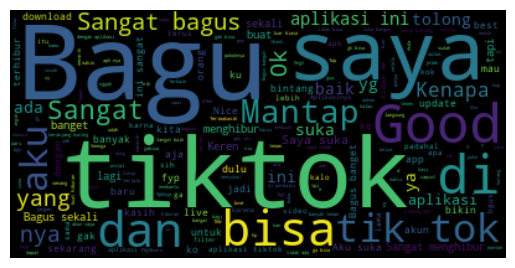

In [1006]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [1007]:
def removePunctuation(strs):
    remove = string.punctuation
    remove = remove.replace("-", "") # don't remove hyphens
    remove = remove.replace("@", "") # don't remove hyphens
    remove = remove.replace("#", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern

    h = re.sub(pattern, " ", strs) 
    return h

def replace(strs):
    strs = strs.replace('\n',' ')
    strs = strs.replace('\t',' ')
    strs = strs.replace('rt',' ')
    return strs

def tokenize(strs):
    tokenizer = TweetTokenizer()
    nltk_tokens = tokenizer.tokenize(strs)
    return nltk_tokens

def removeAkunHastagsEmoji(tokens):
    regexp = re.compile(r'@[a-z]') #Hapus @
    filtered = filter(lambda i: not regexp.search(i), tokens)
    filtered = [i for i in tokens if not regexp.search(i)]
    regexp = re.compile(r'#[a-z0-9]') #Hapus #
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    regexp = re.compile(r'[😂👏🙄👇🤣😅🙄🙈😀☝🙏👆😐👍🤔😊😉😌😊😉✌🤤😭😃🦄💪😔❤😑👉😆😁🙃💐⚡😎👌💯💃🎶👀☀💞😤👊✊😔🛀🙋👼👥😍✊😃💗👎🤦😁😞😡]') #Hapus Emoji
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    return filtered

In [1008]:
data = df
data['text'] = [str(token).lower() for token in data.content]#lowertext
data['text'] = [re.sub(r'http.*', '', i) for i in data.text] #remove link
data['text'] = [re.sub(r'<.*?>', '', i) for i in data.text] #remove html
data['text'] = [removePunctuation(i) for i in data.text] #remove punctuation
data['text'] = [replace(j) for j in data.text] #replace \n \t rt
data['token'] = [nltk.word_tokenize(i) for i in data.text] #tokenize string
data['token'] = [removeAkunHastagsEmoji(i) for i in data.token]

In [1009]:
data.head()

,userName,score,at,content,target,text,token
0,Mm Uu,5,2023-02-07 13:17:28,Sangat mengimpirasi dan membantu tuk bersilatu...,1,sangat mengimpirasi dan membantu tuk bersilatu...,"[sangat, mengimpirasi, dan, membantu, tuk, ber..."
1,israely miguel,1,2023-02-07 09:53:53,Kok apk ini nggak bisa di instal yah Instal le...,0,kok apk ini nggak bisa di instal yah instal le...,"[kok, apk, ini, nggak, bisa, di, instal, yah, ..."
2,Md Meraj,1,2023-02-07 08:41:10,Moon,0,moon,[moon]
3,My Self,5,2023-02-07 08:12:31,Saya sangat suka karna kita bisa lihat teman2 ...,1,saya sangat suka karna kita bisa lihat teman2 ...,"[saya, sangat, suka, karna, kita, bisa, lihat,..."
4,BONITOBOXING22 BENFICA22,5,2023-02-07 08:08:11,👌👌👌👌,1,👌👌👌👌,[]


In [1010]:
stopwords = nltk.corpus.stopwords.words('indonesian')
stopwords.extend(['yg','tok','nya','tik','tkw','nx','gk','bgs','deh','gw','knpa','knp','nia','dg','dgn','bgs','sy','ga','gak','ny','klo','yag','yah','d','sek','mfia','bisness','fideo','tuk','dan','n','dn','sih','tdk','ku','bisah','mendanlow','tida','se','ad','enk','pke','krnjg','dlu',
'bru','bgt','iyan','ente','ains','huhu','kayak','pe','ama','eh','ইসমাঈল','gx','ko','tirifkk','rik','krennnn','nicwe','rh','marisia','bguss','says','bgus','tq','is','bc','it','sad','me','makes','broke','ccd','hhhhhhhhhhhhhhhhhhaa','elo','w','gua','mah','nih','elu','sih','nia','zte','ffg','67','a','c',
'seruuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu','كويس ','টক ','ইটক ','menhibur','aja','ya','karna','apk','apl','sagat','sngt','smoga','banget','so','titok','baget','bagat','madep','bnget','bintan','tpi','anj','wawas','sya','app','tmbh','ajar','biar','the','bngt','you','very','nggak','ajar','bangat','dah','kalo','kasi','apknya'])

def clean_stopwords(text):
    res = []
    for word in text:
        if word not in stopwords and len(word) > 3 :
            res.append(word)
    return res

data['token_bersih'] = [clean_stopwords(i) for i in data.token]

In [1011]:
data.head()

,userName,score,at,content,target,text,token,token_bersih
0,Mm Uu,5,2023-02-07 13:17:28,Sangat mengimpirasi dan membantu tuk bersilatu...,1,sangat mengimpirasi dan membantu tuk bersilatu...,"[sangat, mengimpirasi, dan, membantu, tuk, ber...","[mengimpirasi, membantu, bersilaturrahmi, kese..."
1,israely miguel,1,2023-02-07 09:53:53,Kok apk ini nggak bisa di instal yah Instal le...,0,kok apk ini nggak bisa di instal yah instal le...,"[kok, apk, ini, nggak, bisa, di, instal, yah, ...","[instal, instal, google, chrome, baguss]"
2,Md Meraj,1,2023-02-07 08:41:10,Moon,0,moon,[moon],[moon]
3,My Self,5,2023-02-07 08:12:31,Saya sangat suka karna kita bisa lihat teman2 ...,1,saya sangat suka karna kita bisa lihat teman2 ...,"[saya, sangat, suka, karna, kita, bisa, lihat,...","[suka, lihat, teman2]"
4,BONITOBOXING22 BENFICA22,5,2023-02-07 08:08:11,👌👌👌👌,1,👌👌👌👌,[],[]


In [1012]:
data.token_bersih.unique

<bound method Series.unique of 0       [mengimpirasi, membantu, bersilaturrahmi, kese...
1                [instal, instal, google, chrome, baguss]
2                                                  [moon]
3                                   [suka, lihat, teman2]
4                                                      []
                              ...                        
1844                                                   []
1845    [aplikasi, tiktok, menghibur, suka, terima, ka...
1846                           [every, good, inte, aning]
1847    [duet, video, orang, video, hapus, alasan, mel...
1848                                        [fidoe, film]
Name: token_bersih, Length: 1849, dtype: object>

In [1013]:
for i,v in enumerate(data.token_bersih):
    if len(v) == 0:
        data = data.drop(index=i)

In [1014]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
data['token_bersih'] = [stopword.remove(str(token)) for token in data.token_bersih]


In [1015]:
factory1 = StemmerFactory()
stemmer = factory1.create_stemmer()
data['token_bersih'] = [stemmer.stem(str(token)) for token in data.token_bersih]


In [1016]:
vectorizer = TfidfVectorizer()
data_vektor = vectorizer.fit_transform(data['token_bersih'])
data_vektor

<1565x1635 sparse matrix of type '<class 'numpy.float64'>'
	with 3854 stored elements in Compressed Sparse Row format>

In [1027]:
lda = LatentDirichletAllocation(n_components = 4, random_state = 0)
lda.fit(data_vektor)

LatentDirichletAllocation(n_components=4, random_state=0)

In [1028]:
data_vektor.shape

(1565, 1635)

In [1029]:
data_vektor

<1565x1635 sparse matrix of type '<class 'numpy.float64'>'
	with 3854 stored elements in Compressed Sparse Row format>

In [1030]:

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


feature_names = vectorizer.get_feature_names_out()

# n fitur terbaik untuk setiap topik
no_top_words = 10
display_topics(lda, feature_names, no_top_words)


Topic 0:
bagus suka aplikasi hibur mantap keren tiktok best bantu pokok
Topic 1:
tiktok bintang kasih like senang video bikin akun buka coba
Topic 2:
good tarik seru terimakasih tiktok live happy inspirasi install ikut
Topic 3:
nice baik lumayan puas love tiktok filter baguss ajar kuning


In [1021]:

def plot_heatmap(model, feature_names, no_top_words):
    topics = model.components_
    topic_words = []
    for topic in topics:
        topic_words.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    topic_df = pd.DataFrame(topic_words).T
    plt.figure(figsize=(10, 8))
    sns.heatmap(topic_df, cmap="YlGnBu")
    plt.show()

# Dapatkan nama fitur
feature_names = vectorizer.get_feature_names_out()

# Tampilkan 10 fitur terbaik untuk setiap topik
no_top_words = 10
plot_heatmap(lda, feature_names, no_top_words)


ValueError: could not convert string to float: 'bagus'

<Figure size 1000x800 with 0 Axes>